In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


df = pd.read_csv('titanic.csv')
df.sample(4)

# Hypothesis testing

Algorithm:



*   Formulate hypothesis ($H_0: \mu = 12.3$)
*   Choose the level of significance ($\alpha = 0.05$)
*   Compute the statistic ($Z_{stat} = \frac{M - \mu}{\sigma/\sqrt{n}}$)
*   Compute critical value ($Z_{crit}$) or p-value
*   Compare critical value with statistic or p-value with level of significance
*  Draw conclusions



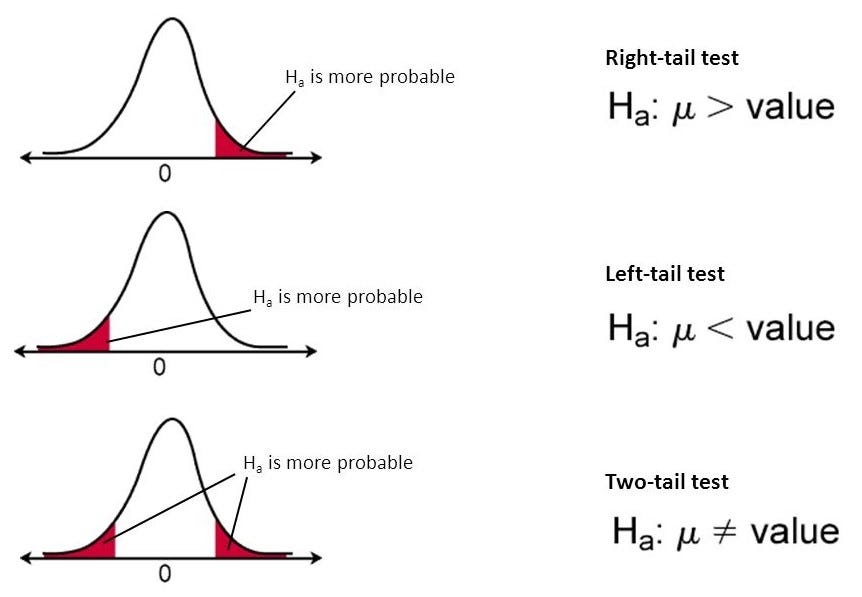

## Z score

Limitations:


*   Assume that the data has normal distribution
*   The variance of population is known



Example:
We asked 100 of HSE students: On average, how many hours do they sleep? Based on this data, we need to test the hypothesis that people sleep an average of 7 hours, given that the standard deviation of the population is 1.

In [ ]:
#results
n = 100
sigma = 1

#Hypothesis
mu = 7


np.random.seed(42)
hse = np.random.normal(7.5, sigma, n)
hse

In [ ]:
M = np.mean(hse)
M #average based on the sample

1. Hypothesis:

$$H_0: \mu = 7$$

$$H_A: \mu \neq 7$$

2. Significance level:

$$α = 5%$$

Alternative is two sided, so the critical values are:

In [ ]:
from scipy.stats import norm
from scipy import stats

alpha = 0.05

print(norm.ppf(alpha/2), norm.ppf(1-alpha/2))

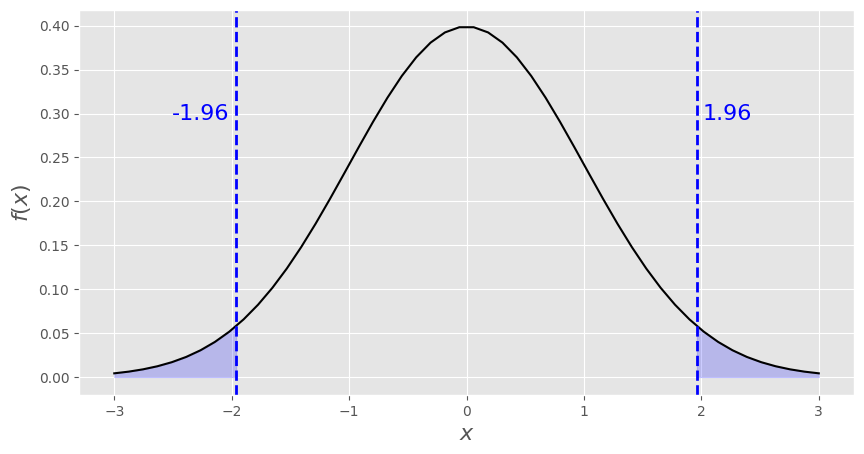

3. Compute the statistic

$$Z_{stat} = \frac{M - \mu}{\sigma / \sqrt{n}}$$

In [ ]:
Z_stat = (M - mu)/ (sigma / np.sqrt(n))
Z_stat

4. Compare statistic and critical value



*   If $Z_stat \in [Z_{crit}^{lower}; Z_{crit}^{upper}]$, we accept $H_0$
*   Otherwise, we reject $H_0$



In [ ]:
if norm.ppf(alpha/2) <= Z_stat <= norm.ppf(1-alpha/2):
  print('accept')
else:
  print('reject')

We can use `ztest` from the python library:

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
# Z-test:
#   data - sample
#   value - value for H_0
#   alternative - type of alternative hypothesis: 'two-sided', 'larger', 'smaller'


#Z_stat and p-value
result = ztest(hse, value = 7.0, alternative = 'two-sided')
result

$Z_{stat}$ is different, because the test from library does not take $\sigma$ parameter, it computes it from the sample:

In [ ]:
(M - mu)/ (hse.std(ddof=1) / np.sqrt(n))

What is p-value (the second number)?

p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the *null hypothesis is correct*. A very small p-value $⇒$ very unlikely outcome.

How to use it:



*   if p-value is smaller than significance level ($\alpha$), the null hypothesis is rejected
*   if p-value is greater or equal than significance level ($\alpha$), the null hypothesis is accepted



In [ ]:
if result[1] >= alpha :
  print('accept')
else:
  print('reject')

Example with Titanic:

In [ ]:
df['Age'].mean()

Mean age seems to be really close to 30, let's check it!

1. Hypothesis:

$$H_0: \mu = 30$$

$$H_A: \mu \neq 30$$

2. Significance level:

$$α = 5%$$

In [ ]:
ztest(df['Age'].dropna(), value = 30.0, alternative = 'two-sided')

Do we accept/reject the hypothesis?

## t score

But if we do not know the standard deviation of the population?

Let's test the same hypothesis and use same data.

$$t = \frac{M - \mu}{s_X/\sqrt{n}}$$

Difference from the previous: $s$ is the sample standard deviation

In [ ]:
from scipy.stats import ttest_1samp

result = ttest_1samp(a=hse, popmean=7, alternative='two-sided')
result

The statistic is the same, but p-value is different and there is new `df` value. This is because the distribution is different, here $t(n-1)$ is used

In [ ]:
if result[1] >= alpha :
  print('accept')
else:
  print('reject')

Let's repeat the experiment with age:

In [ ]:
ttest_1samp(a = df['Age'].dropna(), popmean = 30.0, alternative = 'two-sided')

Do we accept/reject the hypothesis?

## Chi-square test for Independence


We have a survey and ask men and women if they drink coffee, we have the following table:


|                  |Do not drink cofee | Drink coffee  |
|------------------|---------------|------------------|
| Men | 24            | 72              |
| Women | 114           | 93              |


We want to understand if there is some relation between the variables.

Null hypothesis: no relation




In [ ]:
coffee = pd.DataFrame()
coffee['Sex'] = ['men', 'women']
coffee['Do not drink'] = [24, 114]
coffee['Drink'] = [72, 93]
coffee.set_index('Sex', inplace=True)

coffee

In [ ]:
from scipy.stats import chi2_contingency

result = stats.chi2_contingency(coffee, correction=False)
result

Do we reject/accept the null hypothesis?

Example for Titanic: check if there is a relation between sex of the passenger amd the class:

In [ ]:
t = df.groupby('Sex')['Pclass'].value_counts().unstack()
t

In [ ]:
result = stats.chi2_contingency(t, correction=False)
result

## Pearson's chi-squared test

You may be familiar with Mendel and his experiments with pea selection: this story is perfect for illustrating the application of the chi-square test.


Let's also examine what was happening with the peas!

In Mendel's garden pea selection experiments, he observed the frequencies of different types of seeds obtained when crossing plants with round yellow seeds and plants with wrinkled green seeds. These data and the theoretical probability values, determined according to Mendel's law, are presented in the following table:

| Type of seed            | Number of seeds | Expected Mendel's probability |
|----------------------|------------------|------------------|
| Round and yellow     | 315              | 9/16             |
| Wrinkled and yellow | 101              | 3/16             |
| Round and green   | 108              | 3/16             |      
| Wrinkled and green| 32               | 1/16             |

In [ ]:
peas = pd.DataFrame()
peas["Type"] = ["Round and yellow", "Wrinkled and yellow",
                   "Round and green", "Wrinkled and green"]
peas["Number of seeds"] = [315, 101, 108, 32]
peas["Expected probability"] = [9/16, 3/16, 3/16, 1/16]
peas

Let's compute the observed proportion:

In [ ]:
peas['Observed proportion'] = peas["Number of seeds"] / peas["Number of seeds"].sum()
peas

Null hypothesis: the observations are sampled from the expected distribution.

In [ ]:
from scipy.stats import chisquare

#f_obs - Observed frequencies in each category.
#f_exp - Expected frequencies in each category
result = chisquare(f_obs = peas['Observed proportion'],
          f_exp = peas['Expected probability'])
result

Do we reject/accept the null hypothesis?

Example with Titanic: we have 3 classes, maybe the probabilities for classes were 0.25 for first, 0.25 for second and 0.5 for third. Let's check it

In [ ]:
df['Pclass'].value_counts(normalize=True)

In [ ]:
chisquare(f_obs=df['Pclass'].value_counts(normalize=True).tolist(),
          f_exp=[0.5, 0.25, 0.25])

Or maybe 0.002 for third and 0.499 for second and first?

In [ ]:
chisquare(f_obs=df['Pclass'].value_counts(normalize=True).tolist(),
          f_exp=[0.002, 0.499, 0.499])

## Paired samples t-test

We have 2 samples, which are related (pairs of similar units, or one group of units that has been tested twice), want to check if the $\mu$ values are the same.

Null hypothesis:two related or repeated samples have identical average (expected) values

$$
\begin{aligned}
&H_0: μ_1=μ_2 \\
&H_A: μ_1≠μ_2
\end{aligned}
$$

We asked groupmates before and after the session week (same groupmates), how long do they sleep and want to check if the average is the same

In [ ]:
np.random.seed(3)

before = np.random.normal(4.5, 1, 100)
after = before + 5 + np.random.normal(0, 0.5, 100)

In [ ]:
from scipy.stats import ttest_rel

ttest_rel(before, after)

## Independent samples t-test

2 samples that are independent, test if they have same the same $\mu$

Null hypothesis: 2 independent samples have identical average (expected) values

We asked students from HSE and MSU, how long do they sleep.

In [ ]:
np.random.seed(4)

hse = np.random.normal(7.5, 1, 100)
msu = np.random.normal(7.51, 1, 100)

In [ ]:
from scipy.stats import ttest_ind

result = stats.ttest_ind(a=hse,
                         b=msu
                         )
result

Example from Titanic: are the mean age of men and women differ?

In [ ]:
df.groupby('Sex')['Age'].mean()

In [ ]:
result = stats.ttest_ind(a=df[df['Sex'] == 'male']['Age'].dropna(),
                b=df[df['Sex'] == 'female']['Age'].dropna()
                         )
result

## Types of errors

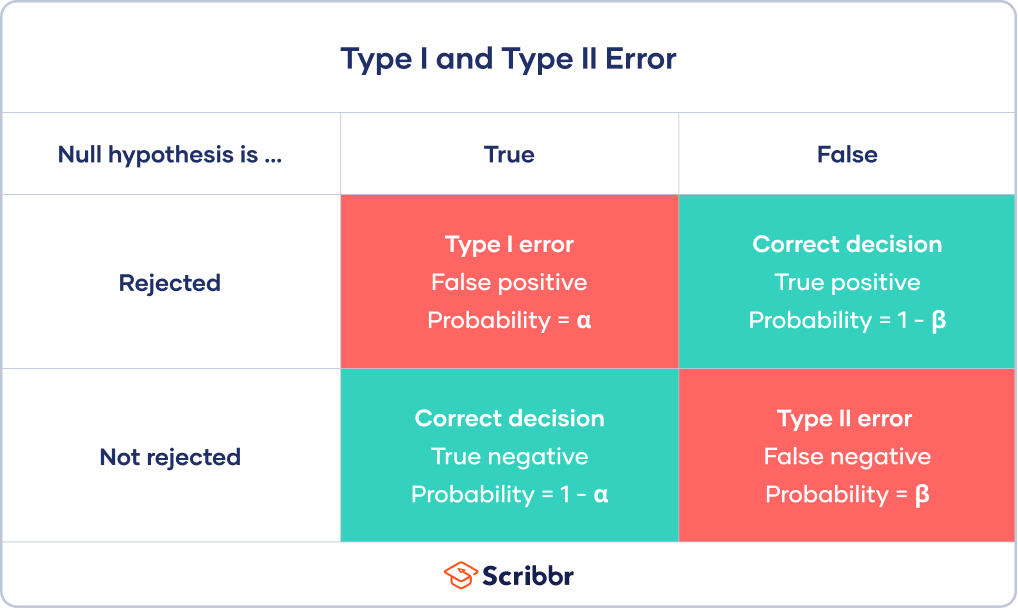

**Task:** What type of error (I or II) are the following situations?



*  Alexander went outside in light clothing and got cold. The null hypothesis: it is cold outside.
*   Mikу didn't take a phone charger, but the phone ran out of battery. The null hypothesis: the phone is sufficiently charged.



# Confidence interval

Confidence interval (CI) is an interval which is expected to  contain the parameter being estimated with some probability.



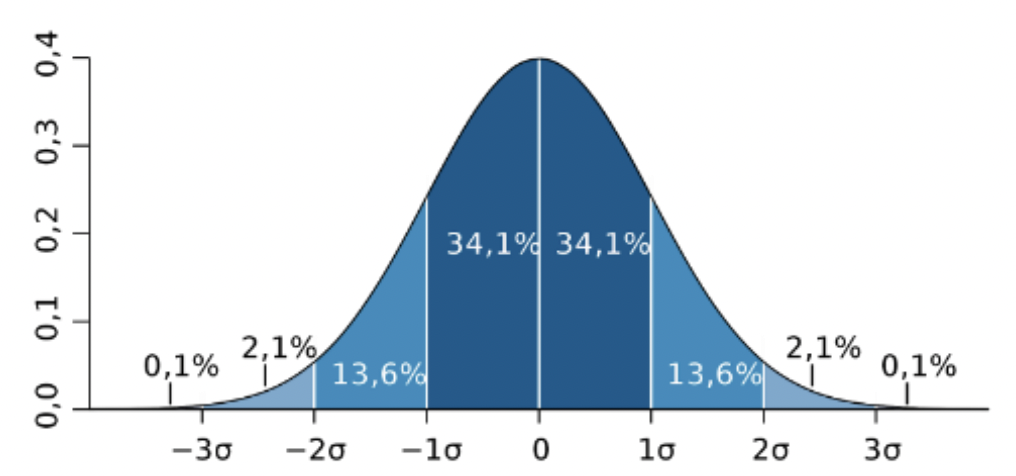

If we want to estimate the $\mu$ for a sample and we know the std ($\sigma$) of the population, we can use the formula:

$$[M -z_{\alpha/2} \frac{\sigma}{\sqrt{n}}; M + z_{\alpha/2} \frac{\sigma}{\sqrt{n}}]$$


If we do not know $\sigma$:

$$[M -t_{\alpha/2} \frac{s}{\sqrt{n}}; M + t_{\alpha/2} \frac{s}{\sqrt{n}}]$$


And we take the distribution $t(n-1)$


$\gamma = 1 -\alpha$ - confidence level (usually 0.9, 0.95 or 0.99)

In [ ]:
from scipy import stats

data1 = np.array([6, 7, 8, 4, 3, 6, 7, 8, 5])
sigma = 1.5
stats.norm.interval(0.95, loc=data1.mean(), scale=sigma/np.sqrt(len(data1)))

In [ ]:
sigma = data1.std(ddof=1)
stats.t.interval(0.95, df=len(data1) - 1, loc=data1.mean(), scale=sigma/np.sqrt(len(data1)))

#Correlation

Let's compute the correlation table:

In [ ]:
df.corr(numeric_only=True)

It is hard to work with big table with float values. It is better to draw a heatmap:

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Questions:



*   Why the diagonal contains only 1?
*   Which features correlate the most? Is it logical?
*   Can we say that if the correlation is close to 1 (or -1) that one observation depends on another?
*   Can we say that if the correlation is close to 0 there is no dependency?



In [ ]:
#Correlation with numpy
x = np.arange(-10, 10.001, 0.01)
y = x ** 2

np.corrcoef(x, y)

**Task**

Create new feature `'NameLength'` that contain the length (in characters) of the name of the person. Compute the correlation table again. What can be noticed?

In [ ]:
# YOUR CODE